<a href="https://colab.research.google.com/github/Sathishk2/Reinforcement-Learning-with-Q-Learning/blob/main/Reinforcement_Learning_with_Q_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

The goal of the agent is to navigate a frozen lake and find the Goal without falling through the ice (render the enviornment above to see an example).

There are:

16 states (one for each square)
4 possible actions (LEFT, RIGHT, DOWN, UP)
4 different types of blocks (F: frozen, H: hole, S: start, G: goal)

In [ ]:
import gym
import numpy as np
import time

env = gym.make('FrozenLake-v1')
STATES = env.observation_space.n
ACTIONS = env.action_space.n

Q = np.zeros((STATES, ACTIONS))

EPISODES = 1500 # how many times to run the enviornment from the beginning
MAX_STEPS = 100  # max number of steps allowed for each run of enviornment

LEARNING_RATE = 0.81  # learning rate
GAMMA = 0.96

RENDER = False # if you want to see training set to true

epsilon = 0.9


In [ ]:
rewards = []
for episode in range(EPISODES):

  state = env.reset()
  for _ in range(MAX_STEPS):

    if RENDER:
      env.render()

    if np.random.uniform(0, 1) < epsilon:
      action = env.action_space.sample()
    else:
      action = np.argmax(Q[state, :])

    next_state, reward, done, _ = env.step(action)

    Q[state, action] = Q[state, action] + LEARNING_RATE * (reward + GAMMA * np.max(Q[next_state, :]) - Q[state, action])

    state = next_state

    if done:
      rewards.append(reward)
      epsilon -= 0.001
      break  # reached goal

print(Q)
print(f"Average reward: {sum(rewards)/len(rewards)}:")
# and now we can see our Q values!

/usr/local/lib/python3.10/dist-packages/gym/utils/passive_env_checker.py:241: DeprecationWarning: `np.bool8` is a deprecated alias for `np.bool_`.  (Deprecated NumPy 1.24)
  if not isinstance(terminated, (bool, np.bool8)):


[[1.94756810e-01 2.49086100e-02 2.53922264e-02 2.59954573e-02]
 [8.37957715e-03 2.47805109e-02 8.42300036e-03 2.23581340e-01]
 [1.65688219e-02 1.07503141e-02 1.69733806e-02 2.10227362e-01]
 [7.83280420e-03 8.00537516e-03 8.05007421e-03 1.05299499e-01]
 [3.27566000e-01 7.02824135e-03 1.60265602e-02 6.40651884e-03]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [1.35747238e-04 2.49862067e-05 1.08850225e-01 1.11316773e-04]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [1.34609836e-02 1.43179557e-02 8.14843319e-03 5.88625745e-01]
 [3.81244124e-03 5.75030913e-01 1.11798772e-03 1.15424612e-02]
 [5.83297810e-01 9.02019677e-04 1.63741038e-03 2.15918395e-03]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [1.17698318e-01 3.30171179e-02 8.29251953e-01 5.48326129e-02]
 [1.27533469e-01 9.85114749e-01 2.34799664e-01 2.29663990e-01]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.000000

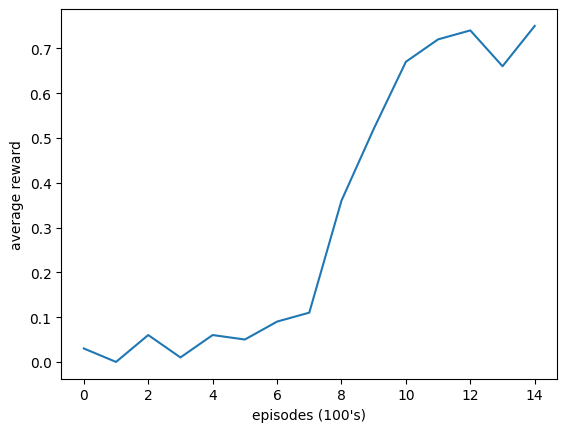

In [ ]:
# we can plot the training progress and see how the agent improved
import matplotlib.pyplot as plt

def get_average(values):
  return sum(values)/len(values)

avg_rewards = []
for i in range(0, len(rewards), 100):
  avg_rewards.append(get_average(rewards[i:i+100]))

plt.plot(avg_rewards)
plt.ylabel('average reward')
plt.xlabel('episodes (100\'s)')
plt.show()